In [1]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [2]:
import numpy as np
def manipulate(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [3]:
import librosa
def manipulate(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [4]:
import librosa
def manipulate(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

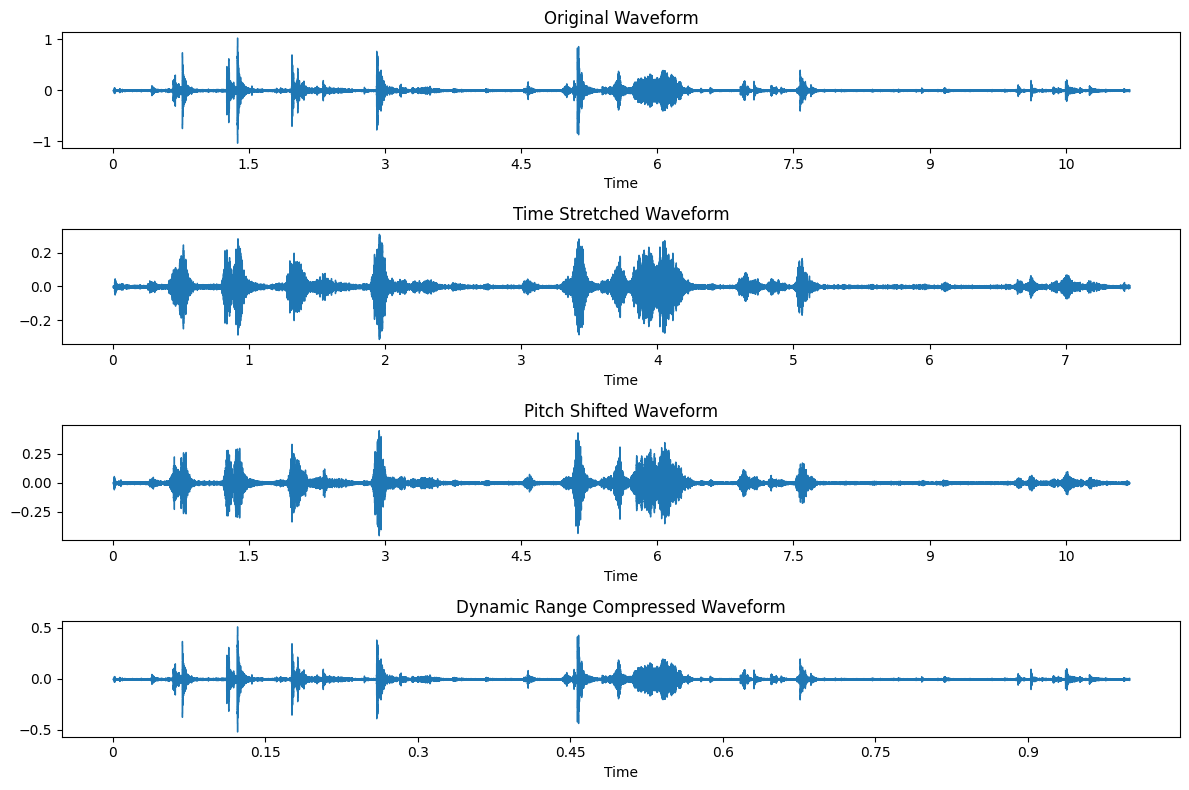

In [41]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Load the audio file
audio_file_path = "../ch10/cats_dogs/cat_1.wav"
y, sr = librosa.load(audio_file_path)

# Function for time stretching augmentation
def time_stretching(y, rate):
    return librosa.effects.time_stretch(y, rate=rate)

# Function for pitch shifting augmentation
def pitch_shifting(y, sr, pitch_factor):
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_factor)

# Function for dynamic range compression augmentation
def dynamic_range_compression(y, compression_factor):
    return y * compression_factor, len(y)

# Apply dynamic range compression augmentation
compression_factor = 0.5  # Adjust as needed
y_compressed, sr_compressed = dynamic_range_compression(y, compression_factor)

# Apply time stretching augmentation
y_stretched = time_stretching(y, rate=1.5)

# Apply pitch shifting augmentation
y_pitch_shifted = pitch_shifting(y, sr=sr, pitch_factor=3)

# Display the original and augmented waveforms
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')

plt.subplot(4, 1, 2)
librosa.display.waveshow(y_stretched, sr=sr)
plt.title('Time Stretched Waveform')

plt.subplot(4, 1, 3)
librosa.display.waveshow(y_pitch_shifted, sr=sr)
plt.title('Pitch Shifted Waveform')

plt.subplot(4, 1, 4)
librosa.display.waveshow(y_compressed, sr=sr_compressed)
plt.title('Dynamic Range Compressed Waveform')

plt.tight_layout()
plt.show()

